<a href="https://colab.research.google.com/github/srichardson0/Hypothesis-testing-of-movie-ratings-data/blob/main/DataAnalysisProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Purpose:**

In this project, I demonstrate the essential skills involved in hypothesis testing. To do so, I
will use a real dataset that stems from a replication attempt of published research (Wallisch & Whritner,
2017). 

I pretend
I am working for a major movie studio that needs to answer these questions in order to optimize their
operations. I use figures as needed to buttress/illustrate my argument.

To
cut down on false positives, set the per-test significance level 𝛼 to 0.005 (as per Benjamin et al., 2018).



---



### **Dataset description:**

This dataset features ratings data of 400 movies from 1097 research participants.

1
st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1 

Row 2-1098: Responses from individual participants

Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)

Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)

Columns 422-464: These columns contain responses to personality questions (1-5)

Columns 465-474: These columns contain self-reported movie experience ratings (1-5)

Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)

Column 476: Only child (1 = yes, 0 = no, -1 = no response)

Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)
Note that we did most of the data munging for you already (e.g. Python interprets commas in a csv file as
separators, so we removed all commas from movie titles), but you still need to handle missing data.


---


### **Hypothetical questions corporate would like answered in the report:**

1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that
are less popular? 

2) Are movies that are newer rated differently than movies that are older? 

3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

4) What proportion of movies are rated differently by male and female viewers?

5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings
vs. those without?

7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who
prefer to watch them alone?

8) What proportion of movies exhibit such a “social watching” effect?

9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana
Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these
are of inconsistent quality, as experienced by viewers? 



In [ ]:
pip install pingouin

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import re
import pingouin as pg
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ks_2samp

In [ ]:
data = pd.read_csv('/content/movieReplicationSet.csv')

In [ ]:
# Extract columns with only movie data (Q1 & Q2)
df1 = data.iloc[:, 0:400]
#df1
#.to_csv('file.csv',index=False)

#df1 = df1.apply(lambda x: pd.Series(x.dropna().values))
#df1 = df1.fillna('')

## Question 1:


In [ ]:
#movies = pd.read_csv('/content/file.csv')

In [ ]:
len(df1['10 Things I Hate About You (1999)'])

1097

In [ ]:
sum_column = df1.sum(axis=0)
sum_column = sum_column.sort_values()

less =sum_column[:len(sum_column)//2]
more = sum_column[len(sum_column)//2:]


In [ ]:
L_pop = less.index
M_pop = more.index

In [ ]:
notPopular = df1.drop(M_pop, axis=1)
notPopular

,The Life of David Gale (2003),Wing Commander (1999),Snatch (2000),Rambo: First Blood Part II,Let the Right One In (2008),The Machinist (2004),Brazil (1985),Change of Habit (1969),Night of the Living Dead (1968),Man on Fire (2004),The Others (2001),Sling Blade (1996),3000 Miles to Graceland (2001),Magnolia (1999),North (1994),Sorority Boys (2002),The Bridges of Madison County (1995),Chain Reaction (1996),Platoon (1986),Signs (2002),Terms of Endearment (1983),The Omen (1976),Just Like Heaven (2005),Showgirls (1995),Diamonds are Forever (1971),Crossroads (2002),Pieces of April (2003),Torque (2004),Fear and Loathing in Las Vegas (1998),Barbarella (1968),The King of Marvin Gardens (1972),The Poseidon Adventure (1972),The Rock (1996),Love Story (1970),Gone in Sixty Seconds (2000),Funny Girl (1968),Honey (2003),Blues Brothers 2000 (1998),Slackers (2002),12 Monkeys (1995),...,A Night at the Roxbury (1998),Ed Wood (1994),Aliens (1986),As Good as it Gets (1997),Butch Cassidy and the Sundance Kid (1969),You're Next (2011),The Final Conflict (1981),City of God (2002),The Transporter (2002),Bad Boys 2 (2003),American History X (1998),FeardotCom (2002),Along Came a Spider (2002),The Mist (2007),Cocktail (1988),The Game (1997),Red Sonja (1985),Freddy Got Fingered (2001),The Village (2004),Miller's Crossing (1990),Suspiria (1977),The Passenger (1975),The Station Agent (2003),A Perfect Murder (1998),Analyze That (2002),The Lookout (2007),21 Grams (2003),Midnight Cowboy (1969),Fatal Attraction (1987),House of Sand and Fog (2003),On Golden Pond (1981),The Descent (2005),Runaway Bride (1999),Gods and Generals (2003),My Father and My Son (2005),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.5,NaN,NaN,...,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
Popular = df1.drop(L_pop, axis=1)
Popular

,Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Fargo (1996),Black Swan (2010),King Kong (1976),A Nightmare on Elm Street (1984),The Fast and the Furious (2001),American Beauty (1999),Psycho (1960),Terminator 3: Rise of the Machines (2003),Star Wars: Episode IV - A New Hope (1977),The Silence of the Lambs (1991),Minority Report (2002),Schindler's List (1993),The Karate Kid Part II (1986),Planet of the Apes (2001),The Godfather: Part II (1974),Indiana Jones and the Temple of Doom (1984),Indiana Jones and the Raiders of the Lost Ark (1981),The Iron Giant (1999),The Matrix Revolutions (2003),The Lost World: Jurassic Park (1997),The Texas Chainsaw Massacre (1974),Taxi Driver (1976),Back to the Future (1985),13 Going on 30 (2004),Billy Madison (1995),Batman & Robin (1997),Jurassic Park III (2001),Mission: Impossible II (2000),Lost in Translation (2003),Star Trek: The Motion Picture (1979),Inglorious Bastards (2009),Clueless (1995),Shrek 2 (2004),Good Will Hunting (1997),Poltergeist (1982),The Last Samurai (2003),The Jungle Book (1967),...,The Mummy Returns (2001),The Nightmare Before Christmas (1993),La La Land (2016),The Princess Bride (1987),The Green Mile (1999),Meet the Parents (2000),Independence Day (1996),Who Framed Roger Rabbit (1988),Star Wars: Episode VII - The Force Awakens (2015),Cast Away (2000),The Babadook (2014),Saw (2004),Star Wars: Episode VI - The Return of the Jedi (1983),Scry Movie (2000),E.T. The Extra-Terrestrial (1982),Halloween (1978),Aladdin (1992),Pirates of the Caribbean: The Curse of the Black Pearl (2003),Men in Black (1997),Eternal Sunshine of the Spotless Mind (2004),Ocean's Eleven (2001),Men in Black II (2002),The Wolf of Wall Street (2013),One Flew Over the Cuckoo's Nest (1975),My Best Friend's Wedding (1997),Iron Man 3 (2013),Big Daddy (1999),Jurassic Park (1993),Captain America: Civil War (2016),Braveheart (1995),Inception (2010),Groundhog Day (1993),Gladiator (2000),The Mummy (1999),Harry Potter and the Goblet of Fire (2005),X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002)
0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.5,3.5,NaN,NaN,NaN,3.5,...,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.5
1,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.5
3,2.0,NaN,3.0,NaN,4.0,NaN,NaN,NaN,3.5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.5,2.5,NaN,NaN,NaN,2.5,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3.5,2.5,1.0,3.5,NaN,NaN,2.5,...,NaN,2.5,4.0,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,4.0,NaN,2.5,NaN,3.0,3.0,1.0,NaN,NaN,NaN,4.0,4.0,NaN,2.0,NaN,2.5,0.5,NaN,3.5,NaN,NaN,NaN,2.5,NaN,3.0,NaN,NaN,2.5
4,3.5,NaN,0.5,1.0,0.0,0.0,NaN,2.5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.0,0.5,NaN,2.5,NaN,NaN,NaN,2.0,3.0,NaN,0.0,NaN,2.0,...,2.5,1.0,1.5,3.0,NaN,2.0,1.0,2.5,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,3.0,1.0,NaN,3.5,1.0,3.0,NaN,3.5,2.5,2.0,NaN,3.5,NaN,3.5,2.0,NaN,1.0,NaN,2.5,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
df_avg = pd.DataFrame(columns=['popular','not popular'])
df_avg['popular'] = Popular.mean(axis=1)
df_avg['not popular'] = notPopular.mean(axis=1)
df_avg = df_avg.dropna()
#df_avg.to_csv('file2.csv',index=False)

In [ ]:
ztest(df_avg['popular'],df_avg['not popular'])

(9.79675452837923, 1.1626118405109236e-22)

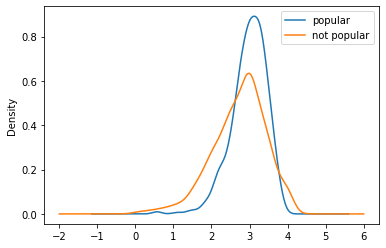

In [ ]:
df_avg.plot.kde()

## Question 2: 

In [ ]:
df1 = df1.rename(columns={'Rambo: First Blood Part II': 'Rambo: First Blood Part II (1985)'})

In [ ]:
pattern = "\((.*?)\)"

substring = []

for col in df1.columns:
  substring.append(re.search(pattern, col).group(1))
  #print(col, substring)

#substring

In [ ]:
new_row = pd.DataFrame(substring)#,columns=df1.columns)
new_row = new_row.transpose()
new_row.columns = df1.columns
new_row


The Mummy (1999) ['2003', '1999', '2012', '1979', '1989', '2000', '1985', '1996', '2008', '2010', '1976', '2004', '1984', '1985', '2001', '1969', '1999', '1960', '2003', '1968', '2004', '1977', '1991', '2001', '2002', '1996', '1993', '2001', '1999', '1986', '2001', '1974', '1984', '1981', '1999', '2003', '1994', '1997', '1974', '1976', '1985', '2004', '2002', '1995', '1995', '1996', '1997', '2001', '1986', '2002', '1983', '2000', '2003', '1979', '2009', '1995', '1976', '2004', '1997', '2005', '1995', '1971', '2002', '2003', '2004', '1982', '1998', '1968', '1972', '1972', '1996', '1970', '2003', '1967', '1973', '2006', '2000', '1968', '2003', '1998', '2009', '2002', '1998', '1999', '2013', '1986', '2002', '2001', '1995', '2001', '1989', '1984', '2002', '2002', '1982', '2014', '1987', '2003', '1967', '2001', '1978', '2001', '1995', '2003', '1980', '1987', '1979', '1994', '2003', '2000', '1988', '1994', '2009', '1980', '1974', '2000', '1996', '2010', '1991', '1996', '2003', '1976', '1966

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),King Kong (1976),The Machinist (2004),A Nightmare on Elm Street (1984),Brazil (1985),The Fast and the Furious (2001),Change of Habit (1969),American Beauty (1999),Psycho (1960),Terminator 3: Rise of the Machines (2003),Night of the Living Dead (1968),Man on Fire (2004),Star Wars: Episode IV - A New Hope (1977),The Silence of the Lambs (1991),The Others (2001),Minority Report (2002),Sling Blade (1996),Schindler's List (1993),3000 Miles to Graceland (2001),Magnolia (1999),The Karate Kid Part II (1986),Planet of the Apes (2001),The Godfather: Part II (1974),Indiana Jones and the Temple of Doom (1984),Indiana Jones and the Raiders of the Lost Ark (1981),The Iron Giant (1999),The Matrix Revolutions (2003),North (1994),The Lost World: Jurassic Park (1997),The Texas Chainsaw Massacre (1974),Taxi Driver (1976),...,One Flew Over the Cuckoo's Nest (1975),Freddy Got Fingered (2001),The Village (2004),Miller's Crossing (1990),My Best Friend's Wedding (1997),Iron Man 3 (2013),Big Daddy (1999),Suspiria (1977),The Passenger (1975),The Station Agent (2003),Jurassic Park (1993),Captain America: Civil War (2016),A Perfect Murder (1998),Analyze That (2002),Braveheart (1995),Inception (2010),Groundhog Day (1993),The Lookout (2007),21 Grams (2003),Gladiator (2000),Midnight Cowboy (1969),Fatal Attraction (1987),House of Sand and Fog (2003),On Golden Pond (1981),The Mummy (1999),The Descent (2005),Runaway Bride (1999),Harry Potter and the Goblet of Fire (2005),Gods and Generals (2003),My Father and My Son (2005),X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2003,1999,2012,1979,1989,2000,1985,1996,2008,2010,1976,2004,1984,1985,2001,1969,1999,1960,2003,1968,2004,1977,1991,2001,2002,1996,1993,2001,1999,1986,2001,1974,1984,1981,1999,2003,1994,1997,1974,1976,...,1975,2001,2004,1990,1997,2013,1999,1977,1975,2003,1993,2016,1998,2002,1995,2010,1993,2007,2003,2000,1969,1987,2003,1981,1999,2005,1999,2005,2003,2005,2003,1995,1994,1975,2002,1970,1997,1996,1977,1989


In [ ]:
df1 = new_row.append(df1, ignore_index=True)


In [ ]:
rslt_df = df1.sort_values(by = 0, axis = 1)
#rslt_df

In [ ]:
old = rslt_df.iloc[ :, 0:200]
new = rslt_df.iloc[:,200:400]

In [ ]:
# drop year row to not affect calculation of means
old = old.iloc[1: , :]
new = new.iloc[1: , :]

In [ ]:
old

,Psycho (1960),The Good the Bad and the Ugly (1966),The Silencers (1966),Who's Afraid of Virginia Woolf (1966),Thoroughly Modern Millie (1967),The Jungle Book (1967),Cool Hand Luke (1967),Barbarella (1968),Rosemary's Baby (1968),Funny Girl (1968),Once Upon a Time in the West (1968),Night of the Living Dead (1968),Midnight Cowboy (1969),Change of Habit (1969),Butch Cassidy and the Sundance Kid (1969),Love Story (1970),Tropic of Cancer (1970),Patton (1970),Billy Jack (1971),Diamonds are Forever (1971),A Clockwork Orange (1971),The Poseidon Adventure (1972),The King of Marvin Gardens (1972),The Godfather (1972),The Exorcist (1973),American Graffiti (1973),Heavy Traffic (1973),The Sting (1973),The Texas Chainsaw Massacre (1974),The Godfather: Part II (1974),Blazing Saddles (1974),The Land That Time Forgot (1974),The Passenger (1975),Jaws (1975),One Flew Over the Cuckoo's Nest (1975),The Omen (1976),Carrie (1976),Taxi Driver (1976),King Kong (1976),Rocky (1976),...,Fargo (1996),Twister (1996),Scream (1996),A Time to Kill (1996),Barb Wire (1996),Independence Day (1996),The Rock (1996),Chain Reaction (1996),Escape from LA (1996),Life is Beautiful (1997),Speed 2: Cruise Control (1997),I Know What You Did Last Summer (1997),Batman & Robin (1997),Anaconda (1997),The Game (1997),Air Force One (1997),As Good as it Gets (1997),Father's Day (1997),Titanic (1997),Good Will Hunting (1997),The Lost World: Jurassic Park (1997),L.A. Confidential (1997),My Best Friend's Wedding (1997),Men in Black (1997),Fear and Loathing in Las Vegas (1998),Blues Brothers 2000 (1998),Godzilla (1998),There's Something About Mary (1998),A Perfect Murder (1998),A Bug's Life (1998),A Night at the Roxbury (1998),The Truman Show (1998),The Big Lebowski (1998),Can't Hardly Wait (1998),American History X (1998),Saving Private Ryan (1998),Armageddon (1998),Austin Powers: The Spy Who Shagged Me (1999),Sleepy Hollow (1999),Runaway Bride (1999)
1,3.5,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,3.5,3.5,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,1,1.5,NaN,NaN,NaN,1,NaN,2.5,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,2.5,NaN,1.5,NaN,NaN,NaN,3.5,1,NaN,2.5,1,3,NaN,1,NaN,2.5,NaN,2,NaN,NaN,NaN,0.5,NaN,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,NaN,NaN,NaN,3,3.5,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
#new

(0.3317355421612955, 0.740088960231742)


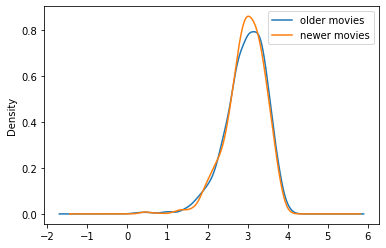

In [ ]:
df_avg2 = pd.DataFrame(columns=['older movies','newer movies'])
df_avg2['older movies'] = old.mean(axis=1)
df_avg2['newer movies'] = new.mean(axis=1)
df_avg2 = df_avg2.dropna()
print(ztest(df_avg2['older movies'],df_avg2['newer movies']))
df_avg2.plot.kde()

## Question 3: 

In [ ]:
df3 = data[['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]
df3 = df3.rename(columns={'Gender identity (1 = female; 2 = male; 3 = self-described)': 'Gender'})
df3 = df3.dropna()
df3 = df3[df3['Gender'] != 3]
df3

,Shrek (2001),Gender
0,3.0,1.0
1,3.0,1.0
2,3.5,1.0
3,0.5,1.0
4,3.0,1.0
...,...,...
1092,3.0,1.0
1093,4.0,1.0
1094,3.5,1.0
1095,2.5,1.0


In [ ]:
male = df3.query('Gender  == 2')['Shrek (2001)']
female = df3.query('Gender == 1')['Shrek (2001)']

In [ ]:
df3.groupby('Gender').describe()

Shrek (2001)                                             
              count      mean       std  min  25%  50%  75%  max
Gender                                                          
1.0           743.0  3.155451  0.906547  0.0  2.5  3.5  4.0  4.0
2.0           241.0  3.082988  0.824975  0.5  2.5  3.0  4.0  4.0

In [ ]:
res = pg.ttest(male, female, correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.10167,982,two-sided,0.270875,"[-0.2, 0.06]",0.081667,0.15,0.196173


There was not a significant difference in ratings for Shrek (2001) between men (M = 3.16, SD = 0.91) and women (M = 3.08, SD = 0.82); t(12) = -1.10, p = .27, %95 CI [-0.2, 0.06], d = 0.08.

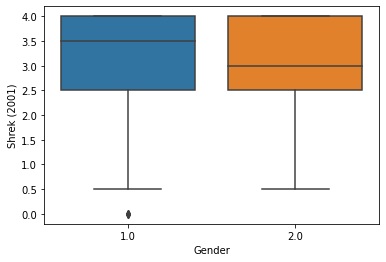

In [ ]:
sns.boxplot(x='Gender', y='Shrek (2001)', data=df3)

## Question 4

In [ ]:
df4 = data.iloc[:, 0:400]
df4['Gender identity (1 = female; 2 = male; 3 = self-described)'] = data['Gender identity (1 = female; 2 = male; 3 = self-described)']
df4 = df4.rename(columns={'Gender identity (1 = female; 2 = male; 3 = self-described)': 'Gender'})
df4 = df4[df4['Gender'] != 3]
#df4

In [ ]:
num_sig = []

for i in df4.iloc[:, 0:400].columns:

  male = df4.query('Gender == 2')[i]
  female = df4.query('Gender == 1')[i]

  res = pg.ttest(male, female, correction=False)
  check = res['p-val'] < 0.005
  if check[0]:
    num_sig.append(i)

num_sig

['Django Unchained (2012)',
 'Alien (1979)',
 'Star Wars: Episode IV - A New Hope (1977)',
 '13 Going on 30 (2004)',
 'Sorority Boys (2002)',
 'Inglorious Bastards (2009)',
 'Clueless (1995)',
 'The Exorcist (1973)',
 'Funny Girl (1968)',
 'The Thing (1982)',
 'Andaz Apna Apna (1994)',
 'The Proposal (2009)',
 'Girl Interrupted (1999)',
 'Divine Secrets of the Ya-Ya Sisterhood (2002)',
 'Ghostbusters (2016)',
 'Cheaper by the Dozen (2003)',
 "Can't Hardly Wait (1998)",
 'Transformers: Age of Extinction (2014)',
 'Saving Private Ryan (1998)',
 'My Big Fat Greek Wedding (2002)',
 'The Cabin in the Woods (2012)',
 'The Firm (1993)',
 '10 Things I Hate About You (1999)',
 'Uptown Girls (2003)',
 'Beauty and the Beauty (1991)',
 'Knight and Day (2010)',
 'The Holiday (2006)',
 'Sixteen Candles (1984)',
 "Harry Potter and the Sorcerer's Stone (2001)",
 'Batman: The Dark Knight (2008)',
 'Grease (1978)',
 'Grown Ups 2 (2013)',
 '8 Mile (2002)',
 'Harry Potter and the Deathly Hallows: Part 2 (

In [ ]:
len(num_sig)

46

In [ ]:
print((len(num_sig)/400) * 100,((400-len(num_sig))/400) * 100)

11.5 88.5


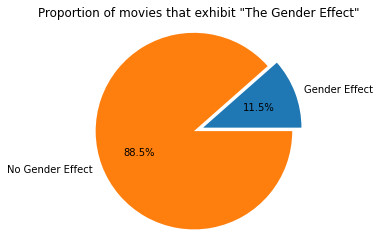

In [ ]:
vals = [11.5,88.5]
my_explode = (0.1, 0)
my_labels = 'Gender Effect','No Gender Effect'
plt.pie(vals,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Proportion of movies that exhibit \"The Gender Effect\"')
plt.axis('equal')
plt.show()

This Pie chart displays the proportion of movies that show a statistical\
difference in ratings (p < 0.005) between male and female viewers. 

Namely, these movies are 'Django Unchained (2012)',
 'Alien (1979)',
 'Star Wars: Episode IV - A New Hope (1977)',
 '13 Going on 30 (2004)',
 'Sorority Boys (2002)',
 'Inglorious Bastards (2009)',
 'Clueless (1995)',
 'The Exorcist (1973)',
 'Funny Girl (1968)',
 'The Thing (1982)',
 'Andaz Apna Apna (1994)',
 'The Proposal (2009)',
 'Girl Interrupted (1999)',
 'Divine Secrets of the Ya-Ya Sisterhood (2002)',
 'Ghostbusters (2016)',
 'Cheaper by the Dozen (2003)',
 "Can't Hardly Wait (1998)",
 'Transformers: Age of Extinction (2014)',
 'Saving Private Ryan (1998)',
 'My Big Fat Greek Wedding (2002)',
 'The Cabin in the Woods (2012)',
 'The Firm (1993)',
 '10 Things I Hate About You (1999)',
 'Uptown Girls (2003)',
 'Beauty and the Beauty (1991)',
 'Knight and Day (2010)',
 'The Holiday (2006)',
 'Sixteen Candles (1984)',
 "Harry Potter and the Sorcerer's Stone (2001)",
 'Batman: The Dark Knight (2008)',
 'Grease (1978)',
 'Grown Ups 2 (2013)',
 '8 Mile (2002)',
 'Harry Potter and the Deathly Hallows: Part 2 (2011)',
 'Chicago (2002)',
 'Apocalypse Now (1979)',
 'The Matrix (1999)',
 'Bend it Like Beckham (2002)',
 'Aladdin (1992)',
 'The Wolf of Wall Street (2013)',
 "My Best Friend's Wedding (1997)",
 'Inception (2010)',
 'Gladiator (2000)',
 'Harry Potter and the Goblet of Fire (2005)',
 'Jaws (1975)',
 'Harry Potter and the Chamber of Secrets (2002)'.

## Question 5

In [ ]:
df5 = data[['The Lion King (1994)','Are you an only child? (1: Yes; 0: No; -1: Did not respond)']]
df5 = df5.rename(columns={'Are you an only child? (1: Yes; 0: No; -1: Did not respond)': 'child'})
df5 = df5.dropna()
df5 = df5[df5['child'] != -1]
#df5

In [ ]:
only = df5.query('child == 1')['The Lion King (1994)']
not_only = df5.query('child == 0')['The Lion King (1994)']

In [ ]:
df5.groupby('child').describe()

The Lion King (1994)                                             
                     count      mean       std  min  25%  50%  75%  max
child                                                                  
0                    776.0  3.481959  0.718194  0.0  3.0  4.0  4.0  4.0
1                    151.0  3.347682  0.816483  0.0  3.0  3.5  4.0  4.0

In [ ]:
res = pg.ttest(only, not_only, correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.053889,925,two-sided,0.040267,"[-0.26, -0.01]",0.182683,0.765,0.536599


There was not a significant difference in ratings for The Lion King (1994) between only children (M = 3.35, SD = 0.82) and people with siblings (M = 3.48, SD = 0.72); t(12) = -2.05, p = .04, %95 CI [-0.26, -0.01], d = 0.183.

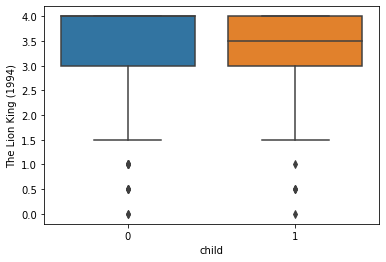

In [ ]:
sns.boxplot(x='child', y='The Lion King (1994)', data=df5)

In [ ]:
only.count() + not_only.count()

927

In [ ]:
print((only.count()/927)*100, (not_only.count()/927)*100)

16.2891046386192 83.71089536138079


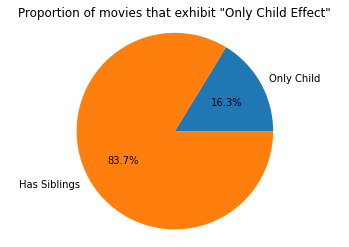

In [ ]:
vals = [16.29,83.71]
my_labels = 'Only Child','Has Siblings'
plt.pie(vals,labels=my_labels,autopct='%1.1f%%')
plt.title('Proportion of movies that exhibit \"Only Child Effect\"')
plt.axis('equal')
plt.show()

## Question 6

In [ ]:
df6 = data.iloc[:, 0:400]
df6['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] = data['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']
df6 = df6.rename(columns={'Are you an only child? (1: Yes; 0: No; -1: Did not respond)': 'child'})
df6 = df6[df6['child'] != -1]
#df6

In [ ]:
num_sig = []

for i in df6.iloc[:, 0:400].columns:

  o_c = df6.query('child == 1')[i]
  c = df6.query('child == 0')[i]

  res = pg.ttest(o_c, c, correction=False)
  check = res['p-val'] < 0.005
  if check[0]:
    num_sig.append(i)

num_sig

['Billy Madison (1995)',
 'The Blue Lagoon (1980)',
 'The Proposal (2009)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Happy Gilmore (1996)',
 'American Psycho (2000)',
 'Star Wars: Episode VII - The Force Awakens (2015)',
 'Star Wars: Episode VI - The Return of the Jedi (1983)',
 'FeardotCom (2002)',
 'Captain America: Civil War (2016)']

In [ ]:
print((len(num_sig)/400) * 100,((400-len(num_sig))/400) * 100)

2.5 97.5


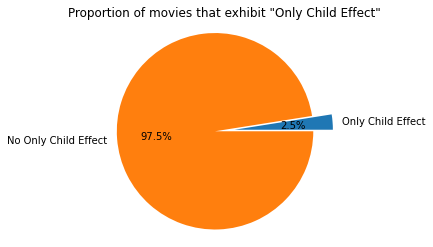

In [ ]:
vals = [2.5,97.5]
my_explode = (0.2, 0)
my_labels = 'Only Child Effect','No Only Child Effect'
plt.pie(vals,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Proportion of movies that exhibit \"Only Child Effect\"')
plt.axis('equal')
plt.show()

This Pie chart displays the proportion of movies that show a statistical\
difference in ratings (p < 0.005) between people with \
siblings and people without. 

Namely, these movies are 'Billy Madison (1995)',
 'The Blue Lagoon (1980)',
 'The Proposal (2009)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Happy Gilmore (1996)',
 'American Psycho (2000)',
 'Star Wars: Episode VII - The Force Awakens (2015)',
 'Star Wars: Episode VI - The Return of the Jedi (1983)',
 'FeardotCom (2002)',
 'Captain America: Civil War (2016)'.

## Question 7 

In [ ]:
df7 = data[['The Wolf of Wall Street (2013)','Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]
df7 = df7.rename(columns={'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)': 'alone'})
df7 = df7.dropna()
df7 = df7[df7['alone'] != -1]
df7

,The Wolf of Wall Street (2013),alone
3,4.0,1
4,3.0,1
5,2.5,0
6,1.0,0
7,3.5,1
...,...,...
1087,4.0,0
1090,4.0,1
1093,3.5,0
1094,2.0,0


In [ ]:
alone_ = df7.query('alone == 1')['The Wolf of Wall Street (2013)']
not_alone = df7.query('alone == 0')['The Wolf of Wall Street (2013)']

In [ ]:
df7.groupby('alone').describe()

The Wolf of Wall Street (2013)                      ...               
                               count      mean       std  ...  50%  75%  max
alone                                                     ...               
0                              270.0  3.033333  0.921047  ...  3.0  3.5  4.0
1                              393.0  3.143766  0.869886  ...  3.5  4.0  4.0

[2 rows x 8 columns]

In [ ]:
res = pg.ttest(alone_, not_alone, correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.567874,661,two-sided,0.117389,"[-0.03, 0.25]",0.123934,0.293,0.346866


In [ ]:
a = res['p-val'] < 0.005
a[0]
  #print('false')

False

There is not a significant difference in ratings for The Wolf of Wall Street (2013) between people who like to watch movies socially (M = 3.14, SD = 0.87) and people who prefer to watch them alone (M = 3.03, SD = 0.92); t(12) = 1.57, p = .12, %95 CI [-0.03, 0.25], d = 0.124.

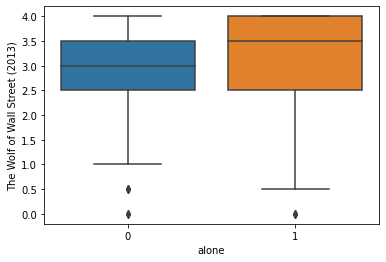

In [ ]:
sns.boxplot(x='alone', y='The Wolf of Wall Street (2013)', data=df7)

## Question 8

In [ ]:

df8 = data.iloc[:, 0:400]
df8['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] = data['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']
df8 = df8.rename(columns={'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)': 'alone'})
df8 = df8[df8['alone'] != -1]

In [ ]:
num_sig = []

for i in df8.iloc[:, 0:400].columns:

  alone_ = df8.query('alone == 1')[i]
  not_alone = df8.query('alone == 0')[i]

  res = pg.ttest(alone_, not_alone, correction=False)
  check = res['p-val'] < 0.005
  if check[0]:
    num_sig.append(i)

num_sig

['The Silence of the Lambs (1991)',
 'North (1994)',
 'Shrek 2 (2004)',
 'Ghostbusters (2016)',
 'Spider-Man (2002)',
 'Donnie Darko (2001)']

In [ ]:
print((len(num_sig)/400) * 100,((400-len(num_sig))/400) * 100)

1.5 98.5


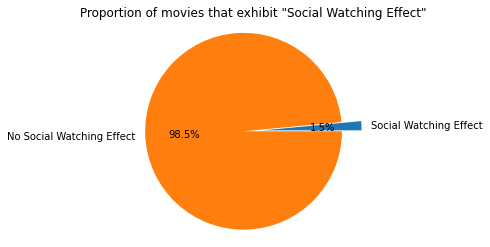

In [ ]:
vals = [1.5,98.5]
my_explode = (0, 0.2)
my_labels = 'Social Watching Effect','No Social Watching Effect'
plt.pie(vals,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Proportion of movies that exhibit \"Social Watching Effect\"')
plt.axis('equal')
plt.show()

This Pie chart displays the proportion of movies that show a statistical\
difference in ratings (p < 0.005) between people who like to watch movies \
socially and people who prefer to watch them alone.

Namely, these movies are 'The Silence of the Lambs (1991)',
 'North (1994)',
 'Shrek 2 (2004)',
 'Ghostbusters (2016)',
 'Spider-Man (2002)',
 'Donnie Darko (2001)'.

## Question 9

In [ ]:
df9 = pd.DataFrame(columns=['Home Alone',"Finding Nemo"])
df9['Home Alone'] = data['Home Alone (1990)']
df9['Finding Nemo'] = data['Finding Nemo (2003)']
df9 = df9.dropna()
#df9

In [ ]:
ztest(df9['Finding Nemo'], df9['Home Alone'], value=0) 

(6.466901805937849, 1.0003260450302703e-10)

In [ ]:
1.0003260450302703e-10 < 0.005

True

There is a statistical difference (p = 1.00e-10) between the ratings distribution of 'Home Alone (1990)' and 'Finding Nemo (2003).

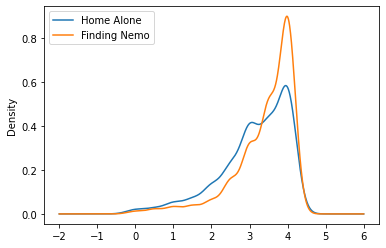

In [ ]:
df9.plot.kde()

## Question 10

In [ ]:
df1 = data.iloc[:, 0:400]

def find(txt):
  franchise = []
  for col in df1.columns:
    if txt in col:
      franchise.append(col)
  return franchise

def runAnova(franchise):
  dfnew = df1[franchise]
  dfnew =pd.melt(dfnew.reset_index(), id_vars=['index'], value_vars=franchise)
  dfnew = dfnew.dropna()
  dfnew.columns = ['index', 'treatments', 'value']

  ax = sns.boxplot(x='treatments', y='value', data=dfnew, color='#99c2a2')
  plt.setp(ax.get_xticklabels(), rotation=15, horizontalalignment='right')
  plt.show()

  model = ols('value ~ C(treatments)', data=dfnew).fit()
  anova_table = sm.stats.anova_lm(model, typ=2)
  print(anova_table)
  

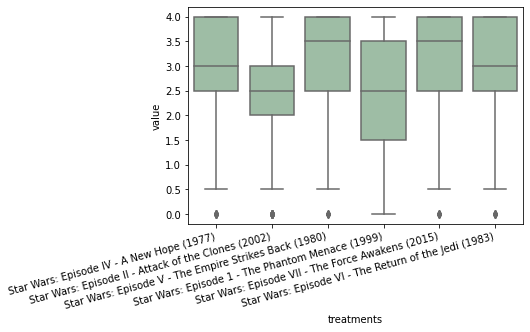

                    sum_sq      df          F        PR(>F)
C(treatments)   232.582648     5.0  45.645133  1.525267e-45
Residual       3009.374770  2953.0        NaN           NaN


In [ ]:
runAnova(find('Star Wars'))

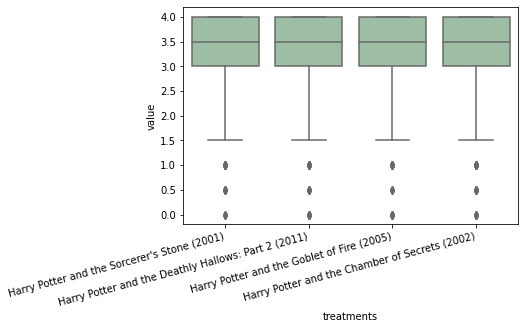

                    sum_sq      df         F    PR(>F)
C(treatments)     1.690780     3.0  0.772987  0.508985
Residual       2446.896646  3356.0       NaN       NaN


In [ ]:
runAnova(find('Harry Potter'))

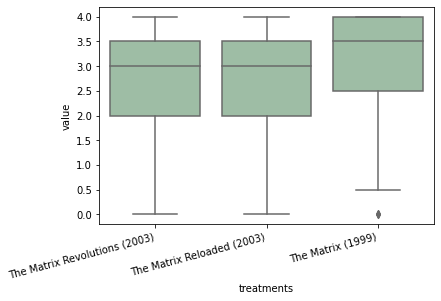

                    sum_sq      df          F        PR(>F)
C(treatments)    46.555860     2.0  25.077059  2.137460e-11
Residual       1117.620196  1204.0        NaN           NaN


In [ ]:
runAnova(find('The Matrix'))

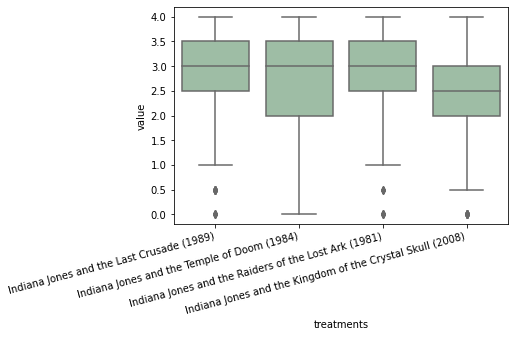

                    sum_sq      df          F        PR(>F)
C(treatments)    38.554087     3.0  14.566513  2.261329e-09
Residual       1537.768466  1743.0        NaN           NaN


In [ ]:
runAnova(find('Indiana Jones'))

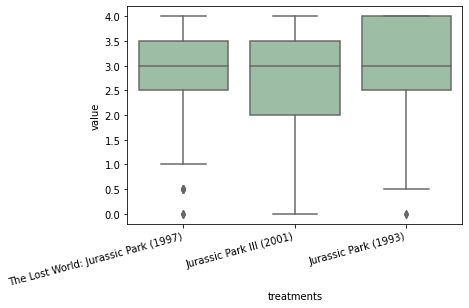

                    sum_sq      df          F        PR(>F)
C(treatments)    37.206711     2.0  22.716093  1.838657e-10
Residual       1387.302128  1694.0        NaN           NaN


In [ ]:
runAnova(find('Jurassic Park'))

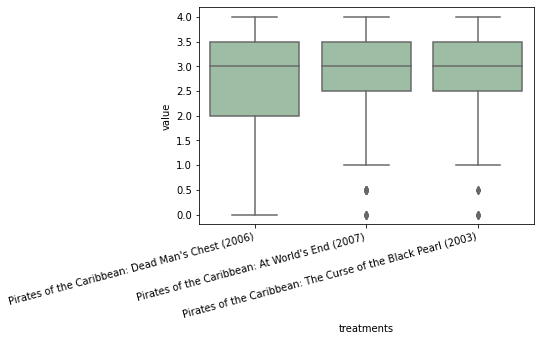

                    sum_sq      df        F    PR(>F)
C(treatments)    17.298551     2.0  9.67205  0.000066
Residual       1912.810693  2139.0      NaN       NaN


In [ ]:
runAnova(find('Pirates of the Caribbean'))

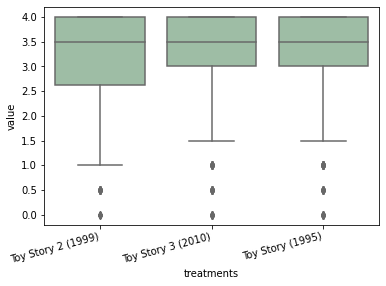

                    sum_sq      df         F    PR(>F)
C(treatments)    11.189410     2.0  7.670931  0.000476
Residual       1975.048694  2708.0       NaN       NaN


In [ ]:
runAnova(find('Toy Story'))

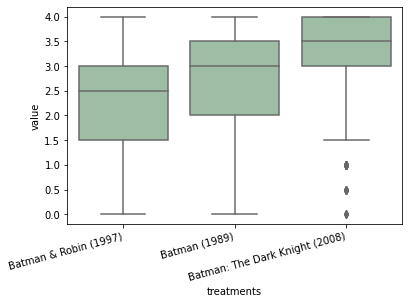

                    sum_sq      df           F        PR(>F)
C(treatments)   193.778069     2.0  108.260451  1.538340e-44
Residual       1294.115650  1446.0         NaN           NaN


In [ ]:
runAnova(find('Batman'))

##Extra

In [ ]:
dfx = data.iloc[:, 0:400]
dfx['Depressed'] = data['Is depressed/Blue']
dfx = dfx[dfx['Depressed'] != 2]
dfx = dfx[dfx['Depressed'] != 3]
dfx = dfx[dfx['Depressed'] != 4]
dfx

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),King Kong (1976),The Machinist (2004),A Nightmare on Elm Street (1984),Brazil (1985),The Fast and the Furious (2001),Change of Habit (1969),American Beauty (1999),Psycho (1960),Terminator 3: Rise of the Machines (2003),Night of the Living Dead (1968),Man on Fire (2004),Star Wars: Episode IV - A New Hope (1977),The Silence of the Lambs (1991),The Others (2001),Minority Report (2002),Sling Blade (1996),Schindler's List (1993),3000 Miles to Graceland (2001),Magnolia (1999),The Karate Kid Part II (1986),Planet of the Apes (2001),The Godfather: Part II (1974),Indiana Jones and the Temple of Doom (1984),Indiana Jones and the Raiders of the Lost Ark (1981),The Iron Giant (1999),The Matrix Revolutions (2003),North (1994),The Lost World: Jurassic Park (1997),The Texas Chainsaw Massacre (1974),Taxi Driver (1976),...,Freddy Got Fingered (2001),The Village (2004),Miller's Crossing (1990),My Best Friend's Wedding (1997),Iron Man 3 (2013),Big Daddy (1999),Suspiria (1977),The Passenger (1975),The Station Agent (2003),Jurassic Park (1993),Captain America: Civil War (2016),A Perfect Murder (1998),Analyze That (2002),Braveheart (1995),Inception (2010),Groundhog Day (1993),The Lookout (2007),21 Grams (2003),Gladiator (2000),Midnight Cowboy (1969),Fatal Attraction (1987),House of Sand and Fog (2003),On Golden Pond (1981),The Mummy (1999),The Descent (2005),Runaway Bride (1999),Harry Potter and the Goblet of Fire (2005),Gods and Generals (2003),My Father and My Son (2005),X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),Depressed
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,2.5,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,2.5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.5,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
num_sig = []

for i in dfx.iloc[:, 0:400].columns:

  one = dfx.query('Depressed == 1')[i]
  five = dfx.query('Depressed == 5')[i]

  res = pg.ttest(one, five, correction=False)
  check = res['p-val'] < 0.005
  if check[0]:
    num_sig.append(i)

num_sig

['The Fast and the Furious (2001)',
 'Avatar (2009)',
 'Top Gun (1986)',
 'Interstellar (2014)',
 'Ghostbusters (2016)',
 'Spider-Man (2002)',
 'The Babadook (2014)']

In [ ]:
print((len(num_sig)/400) * 100,((400-len(num_sig))/400) * 100)

1.7500000000000002 98.25


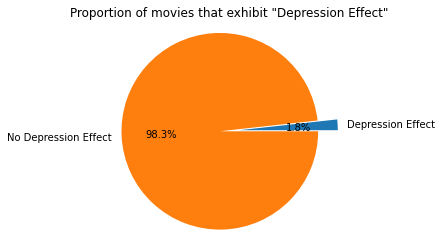

In [ ]:
vals = [1.75,98.25]
my_explode = (0.2, 0.0)
my_labels = 'Depression Effect','No Depression Effect'
plt.pie(vals,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Proportion of movies that exhibit \"Depression Effect\"')
plt.axis('equal')
plt.show()